In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge, Ridge
from sklearn.kernel_approximation import Nystroem
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
# load data and split into X (features) and y (target variable)
data = pd.read_csv(r'D:\MyStuff\Important_tables\Loan_master\loan_master_table_lt.csv', low_memory=False)
print("Table with rows and columns :", data.shape)
print(list(data.columns))


Table with rows and columns : (696680, 222)
['customerId', 'digitalLoanAccountId', 'loanAccountNumber', 'loanRequestAmount', 'loanRequestTenure', 'startApplyDateTime', 'customerCategory', 'applicationStatus', 'timeToDecision', 'approvedDateTime', 'flagApproval', 'approvedLoanAmount', 'approvedLoanTenure', 'rejectedDateTime', 'flagRejection', 'signedDateTime', 'timeToSigned', 'flagSigned', 'disbursementDateTime', 'payrollLinked', 'rateOfInterest', 'flagDisbursement', 'disbursedLoanAmount', 'disbursedLoanTenur', 'firstDueDate', 'secondDueDate', 'thirdDueDate', 'obsFPD00', 'obsFPD05', 'obsFPD10', 'obsFPD15', 'obsFPD30', 'obsSPD10', 'obsSPD15', 'obsSPD30', 'obsTPD10', 'obsTPD15', 'obsTPD30', 'defFPD00', 'defFPD05', 'defFPD10', 'defFPD15', 'defFPD30', 'defSPD10', 'defSPD15', 'defSPD30', 'defTPD10', 'defTPD15', 'defTPD30', 'currentDelinquency', 'bucket', 'loanPaidStatus', 'lastPaidDT', 'paymentDueButNotpaidDates', 'purposeDescription', 'bankName', 'flagSecondMobileNumber', 'salaryDays', 'pay

In [5]:
print("Before selection shape", data.shape)
data = data[data['obsFPD30']==1]
print("After selection shape", data.shape)

Before selection shape (696680, 222)
After selection shape (39681, 222)


In [6]:
data = data[['loanRequestAmount', 'loanRequestTenure','defFPD30' ,'obsFPD30', 'purposeDescription', 'industryDescription', 'natureofwork', 'credolabScore', 'maritalStatus', 'age', 'monthlyIncome', 'gender', 'docType', 'subIndustryDescription']]
print("After manual feature selection the shape of data is :", data.shape)

After manual feature selection the shape of data is : (39681, 14)


In [7]:
# checking features
cat = data.select_dtypes(include='O').keys()
# display the categorical variables
cat

Index(['purposeDescription', 'industryDescription', 'natureofwork',
       'maritalStatus', 'gender', 'docType', 'subIndustryDescription'],
      dtype='object')

In [8]:
# unique values in each columns
for x in data[cat].columns:
    #prinfting unique values
    print(x ,':', len(data[x].unique()))

purposeDescription : 103
industryDescription : 8
natureofwork : 27
maritalStatus : 5
gender : 2
docType : 47
subIndustryDescription : 56


In [9]:
data = pd.get_dummies(data, columns = cat)
print("Shape of data after creating dummies", data.shape)

Shape of data after creating dummies (39681, 251)


In [ ]:
print(list(data.columns))

In [10]:
X = data.drop('defFPD30', axis=1)
y = data['defFPD30']

In [11]:
X.isnull().sum()

loanRequestAmount                             1
loanRequestTenure                             0
obsFPD30                                      0
credolabScore                               824
age                                           0
                                           ... 
subIndustryDescription_Textile / Garment      0
subIndustryDescription_Trading                0
subIndustryDescription_Travel & Tourism       0
subIndustryDescription_White Goods            0
subIndustryDescription_e-Commerce             0
Length: 250, dtype: int64

In [12]:
X.credolabScore = X.credolabScore.fillna(X.credolabScore.median())
X.loanRequestAmount = X.loanRequestAmount.fillna(X.loanRequestAmount.mean())

In [15]:
print("Is there still any column with null value. :", X.isnull().sum())

Is there still any column with null value. : loanRequestAmount                           0
loanRequestTenure                           0
obsFPD30                                    0
credolabScore                               0
age                                         0
                                           ..
subIndustryDescription_Textile / Garment    0
subIndustryDescription_Trading              0
subIndustryDescription_Travel & Tourism     0
subIndustryDescription_White Goods          0
subIndustryDescription_e-Commerce           0
Length: 250, dtype: int64


In [37]:
# train random forest classifier
rf = RandomForestClassifier(n_estimators = 10)
rf.fit(X, y)



RandomForestClassifier(n_estimators=10)

In [38]:
# get feature importances
importances = rf.feature_importances_
features = X.columns

# Create a dataframe to display the results
score_card = pd.DataFrame({'Feature': features, 'Importance Score': importances})

# Sort the dataframe by importance score in descending order
score_card = score_card.sort_values('Importance Score', ascending=False)

# Print the score card with the actual column names from the database
print(score_card)

# # print feature importances
# for i, importance in enumerate(importances):
#     print('Feature {}: {}'.format(i+1, importance))

                                              Feature  Importance Score
3                                       credolabScore          0.102377
0                                   loanRequestAmount          0.092385
1                                   loanRequestTenure          0.089131
5                                       monthlyIncome          0.082731
4                                                 age          0.075881
..                                                ...               ...
89  purposeDescription_Washing machine, dryer or b...          0.000000
58  purposeDescription_Stereo set, Soundbar, Audio...          0.000000
43  purposeDescription_Sala set, Couch, Sofa set,O...          0.000000
42  purposeDescription_Sala set, Couch, Sofa set,O...          0.000000
57  purposeDescription_Stereo set, Soundbar, Audio...          0.000000

[250 rows x 2 columns]


In [39]:
score_card.to_csv("Randomforest_importantfeatures.csv", index = False)

In [ ]:
data.head()

In [ ]:
X = data.drop('defFPD30', axis=1)
y = data['defFPD30']

In [ ]:
print("X Shape", X.shape)
print("y Shape", y.shape)

In [19]:
X.shape[0] == y.shape[0]

True

In [22]:
len(X_train)

31744

In [47]:
X_train,X_test,y_train, y_test = train_test_split(X, y,test_size=0.3)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
s = sel.fit(X_train, y_train)

In [48]:
s.get_support()

array([ True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False,

In [49]:
selected_feat= X_train.columns[(s.get_support())]
len(selected_feat)

46

In [50]:
print(selected_feat)

Index(['loanRequestAmount', 'loanRequestTenure', 'credolabScore', 'age',
       'monthlyIncome', 'purposeDescription_Education',
       'purposeDescription_Home Repair & Improvement',
       'purposeDescription_Living Expenses',
       'purposeDescription_Medical or Other Emergency/Health Care',
       'purposeDescription_Others', 'industryDescription_Agriculture',
       'industryDescription_Financial Services',
       'industryDescription_Government Institution',
       'industryDescription_Manufacturing', 'industryDescription_Services',
       'industryDescription_Technology', 'natureofwork_Admin/Secretarial',
       'natureofwork_Call Center Agent/Tele Marketer',
       'natureofwork_Doctor/Dentist/Medical Professional',
       'natureofwork_Govt Employee', 'natureofwork_IT Professional',
       'natureofwork_Other Professional services',
       'natureofwork_Sales/Marketing Professional',
       'maritalStatus_Live-in Partner', 'maritalStatus_Married',
       'maritalStatus_Single

<AxesSubplot:>

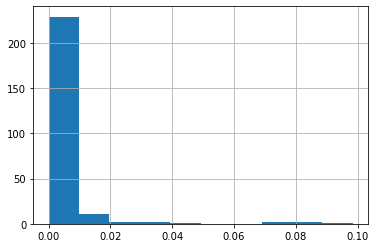

In [51]:
pd.Series(s.estimator_.feature_importances_.ravel()).hist()

In [40]:
from sklearn.metrics import classification_report

In [54]:
y_pred = rf.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7005
           1       1.00      0.95      0.97      4900

    accuracy                           0.98     11905
   macro avg       0.98      0.98      0.98     11905
weighted avg       0.98      0.98      0.98     11905

